<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/1stWeekTask/SocialNetworkAds_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Menggunakan algoritma Logistic Regression untuk memprediksi apakah seorang pelanggan akan membeli produk atau tidak**

In [1]:
# Mengimpor pustaka yang diperlukan untuk manipulasi array, visualisasi, dan pengolahan data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Membaca dataset dari file CSV
dataset = pd.read_csv('sample_data/Social_Network_Ads.csv')

In [3]:
# Memisahkan fitur (X) dan target (y) dari dataset
X = dataset.iloc[:, :-1].values  # Mengambil semua kolom kecuali kolom terakhir sebagai fitur
y = dataset.iloc[:, -1].values   # Mengambil kolom terakhir sebagai target


In [4]:
# Membagi dataset menjadi set pelatihan dan pengujian (75% training, 25% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [5]:
# Mengimpor dan menggunakan StandardScaler untuk menormalkan fitur
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  # Membuat objek StandardScaler
X_train = sc.fit_transform(X_train)  # Menormalkan data pelatihan
X_test = sc.transform(X_test)  # Menormalkan data pengujian menggunakan transformasi yang sama


In [6]:
# Mengimpor algoritma Regresi Logistik
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)  # Membuat model regresi logistik
classifier.fit(X_train, y_train)  # Melatih model menggunakan data pelatihan


LogisticRegression(random_state=0)

# **Mencoba test model dengan contoh kasus seorang yang berusia 26 tahun dengan gaji 88.000 dolar, apakah ia akan membeli mobil (1) atau tidak (0)**

In [7]:
# Memprediksi hasil menggunakan data baru [umur, gaji]
print(classifier.predict(sc.transform([[26, 88000]])))  # Melakukan prediksi untuk data baru


[0]


# **Mencoba membuat perbandingan antara prediksi model dengan data test, jika nilai prediksi sama dengan test maka prediksi benar dan akan membuat akurasi menjadi lebih tinggi**

In [8]:
# Memprediksi hasil pada data pengujian
y_pred = classifier.predict(X_test)

In [9]:
# Menampilkan prediksi yang digabungkan dengan hasil yang sebenarnya
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))


[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


In [10]:
# Mengimpor metrik untuk evaluasi model
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)  # Membuat confusion matrix untuk melihat performa model
print(cm)  # Menampilkan confusion matrix
accuracy_score(y_test, y_pred)  # Menghitung dan menampilkan akurasi model


[[65  3]
 [ 8 24]]


0.89

<ipython-input-11-a0c0294f5212>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


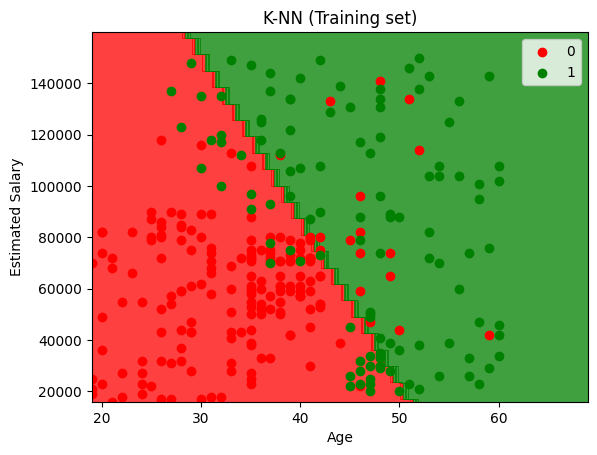

In [11]:
# Membuat visualisasi hasil klasifikasi pada set pelatihan
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train  # Mengembalikan skala asli dari data pelatihan
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() + 1, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() + 1000, stop = X_set[:, 1].max() + 10000, step = 10))

# Menggambar batas keputusan menggunakan prediksi dari classifier
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())  # Membatasi sumbu X sesuai data
plt.ylim(X2.min(), X2.max())  # Membatasi sumbu Y sesuai data

# Menggambar titik data pelatihan pada grafik
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

# Menambahkan judul dan label pada grafik
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan grafik

<ipython-input-12-a3098d08989a>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


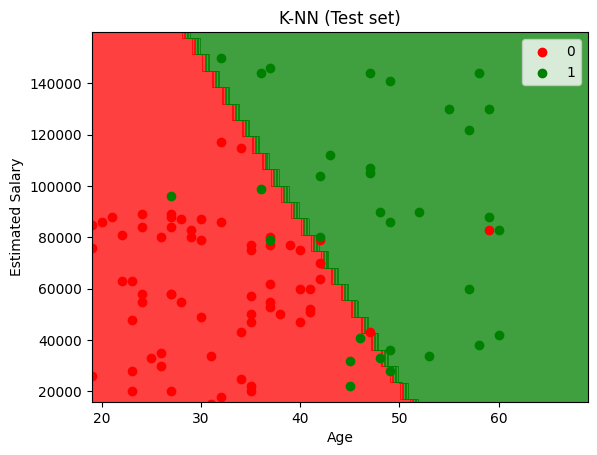

In [12]:
# Membuat visualisasi hasil klasifikasi pada set pengujian
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test  # Mengembalikan skala asli dari data pengujian
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() + 1, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() + 1000, stop = X_set[:, 1].max() + 10000, step = 10))

# Menggambar batas keputusan menggunakan prediksi dari classifier
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())  # Membatasi sumbu X sesuai data
plt.ylim(X2.min(), X2.max())  # Membatasi sumbu Y sesuai data

# Menggambar titik data pengujian pada grafik
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

# Menambahkan judul dan label pada grafik
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan grafik